In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc
session = Session(engine)


In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
class_names = Base.classes.keys()
print(class_names)

['measurement', 'station']


In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)
measurement_data = session.query(Measurement).limit(5).all()
for data in measurement_data:
    print(data.date, data.prcp)


2010-01-01 0.08
2010-01-02 0.0
2010-01-03 0.0
2010-01-04 0.0
2010-01-06 None


In [10]:
# Create our session (link) from Python to the DB
measurement_data = session.query(Measurement).limit(5).all()
for data in measurement_data:
    print(data.date, data.prcp)
    session.close()

2010-01-01 0.08
2010-01-02 0.0
2010-01-03 0.0
2010-01-04 0.0
2010-01-06 None


# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.

most_recent_date = session.query(Measurement.date).order_by(desc(Measurement.date)).first()



print("Most recent date:", most_recent_date[0])

Most recent date: 2017-08-23


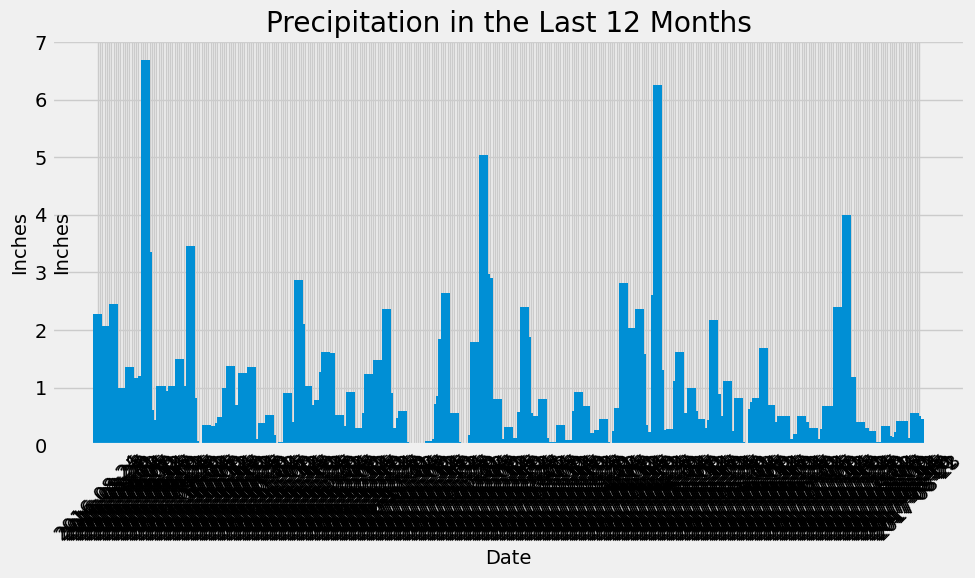

In [27]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(func.max(Measurement.date)).scalar()
# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df = df.sort_values('Date')


# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Precipitation'], width=4)
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation in the Last 12 Months")
plt.xticks(rotation=45)
plt.ylabel("Inches") 
plt.text(0, 0.5, 'Inches', transform=plt.gca().transAxes, va='center', rotation='vertical')
plt.tight_layout()
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_data = session.query(Measurement.prcp).all()



df = pd.DataFrame(precipitation_data, columns=['Precipitation'])


summary_stats = df.describe()


print(summary_stats)

       Precipitation
count   18103.000000
mean        0.160644
std         0.468746
min         0.000000
25%         0.000000
50%         0.010000
75%         0.110000
max        11.530000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

session.close()

print("Total number of stations:", total_stations)

Total number of stations: 9


In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()




print("Most active stations:")
for station, count in most_active_stations:
    print(station, count)

Most active stations:
USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

most_active_station_id = most_active_stations[0][0]


temperature_summary = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).all()




print("Temperature summary for the most active station:")
print(temperature_summary)

Temperature summary for the most active station:
[(54.0, 85.0, 71.66378066378067)]


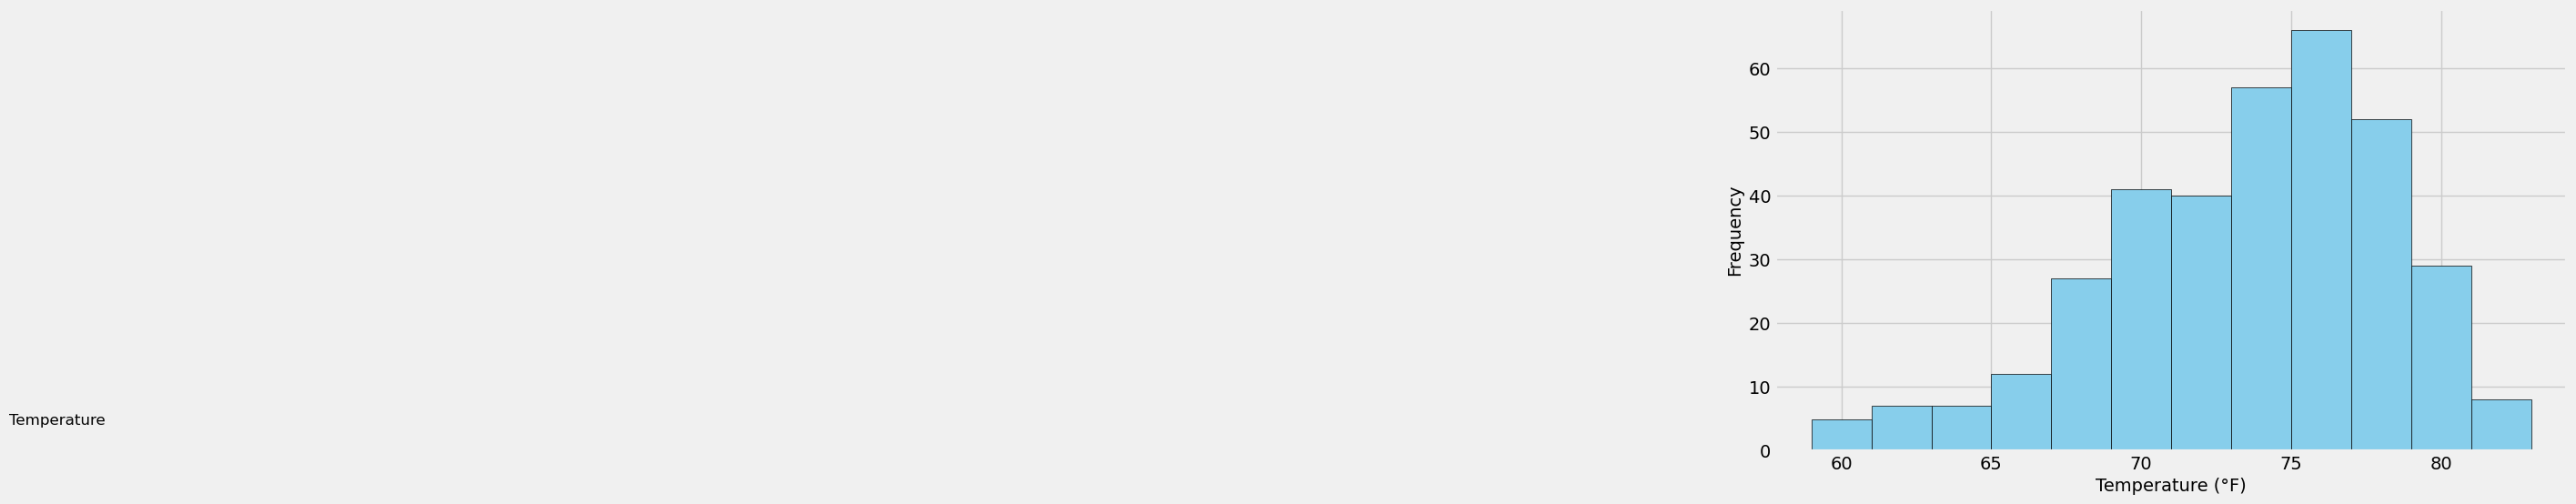

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

most_active_station_id = most_active_stations[0][0]

most_recent_date = session.query(func.max(Measurement.date)).scalar()


one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

temperature_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= one_year_ago).\
    filter(Measurement.station == most_active_station_id).all()

df = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])


plt.figure(figsize=(10, 6))
plt.hist(df['Temperature'], bins=12, color='skyblue', edgecolor='black')
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.text(0.5, 4.183333333333314, 'Temperature', fontsize=12, ha='center') 
plt.subplots_adjust(top=0.88) 
plt.show()




# Close Session

In [26]:
# Close Session
session.close()